이직여부 판단 데이터
데이터 설명 : 이직여부 판단 데이터 (target: 1: 이직 , 0 : 이직 x)


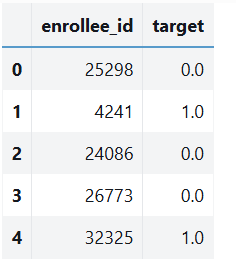

In [24]:
X_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/HRdata/X_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/HRdata/y_train.csv")
X_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/HRdata/X_test.csv")
X_train[


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,25298,city_138,0.836,Male,No relevent experience,Full time course,High School,NaN,5,100-500,Pvt Ltd,1,45
1,4241,city_160,0.920,Male,No relevent experience,Full time course,High School,NaN,5,NaN,NaN,1,17
2,24086,city_57,0.866,Male,No relevent experience,no_enrollment,Graduate,STEM,10,NaN,NaN,1,50
3,26773,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,>4,135
4,32325,city_143,0.740,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12447,29597,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,<1,50-99,Pvt Ltd,1,55
12448,27821,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,7
12449,21812,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Pvt Ltd,1,36
12450,28416,city_160,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,10,NaN,NaN,2,41


이문제의 포인트 ->난이도 좀 있는듯

1.   결측치가 많은 데이터

*   결측치 제거를 위해 데이터 합치기 필요
*   결측치 제거 후 y값과 , test_id pop등 이후에 진행해야함
*   결측치 제거를 무자비하게 하면 많은 데이터 손실로 위험함

2.   >20, <1 등등 수치형같이 보이지만 obeject형이 있어 이를 수치형으로 변경해줘야함
    but 그 사이에 >20과 <1이거를 def를 통해 숫자로 변환해줘야함



In [72]:
import pandas as pd
#데이터 로드
X_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/HRdata/X_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/HRdata/y_train.csv")
X_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/HRdata/X_test.csv")


# display(X_train.head())
# display(y_train.head())
# # display(X_test.head())


X_train = X_train.drop(['enrollee_id', 'city'], axis=1)
X_test = X_test.drop('city', axis=1)
#1. target값 추출
target = y_train.pop('target')

#2. 결합 -> 만약 데이터 개수가 똑같으면 굳이, 근데 결측치가 많아서 dropna이런걸 많이 했잖아? 그럼 개수가 달라지겠지, 모두 결측치를 대체한게 아니니, 그럼 합쳐서 결측치 처리 후 다시 분리해야함
          # 인코딩할때 target도 학습을 하므로 그냥 무조건 결측치 제거후 다시 빼주자!
X_train = pd.concat([X_train, target], axis=1)

# X_train

# #3. test데이터 id 분리 -> 이건 지금 하면 안되고, 결측치 제거 한다음에 해야함!!! 즉 여기서 하면 결측치 제거할때 개수 안맞음
# X_test_id = X_test.pop('enrollee_id')

# #X_train과 target값의 행수가 다르면 train_test_split이 안됨 그래서 처음부터 합쳐놓고 처리를 해야함! -> 즉) 첨에 shape로 갯수를 보고 만약 결측치에서 dropna를 할거면 합친다음 분리 해야한다는거임


# # #결측치 채우기 -> 대부분의 것들이 대체하기 애매하므로 missing으로 만들기 / 너무 결측치가 많은데 제거하면 문제생김
X_train['gender'] = X_train['gender'].fillna('missing')
X_train['gender'] = X_train['gender'].str.replace('Other', 'missing')
X_train['enrolled_university'] = X_train['enrolled_university'].fillna('missing')
X_train['education_level'] = X_train['education_level'].fillna('UnKnown')
X_train['major_discipline'] = X_train['major_discipline'].fillna('NoMajor')
X_train = X_train.dropna(subset = ['experience'])
X_train['company_size'] = X_train['company_size'].fillna('missing')
X_train['company_type'] = X_train['company_type'].fillna('missing')
X_train['last_new_job'] = X_train['last_new_job'].fillna('missing')
#target값에 결측치는 반드시 삭제해야함 왜냐면 기준이 없어지기 때문에!!!!
X_train = X_train.dropna(subset='target')

X_test['gender'] = X_test['gender'].fillna('missing')
X_test['gender'] = X_test['gender'].str.replace('Other', 'missing')
X_test['enrolled_university'] = X_test['enrolled_university'].fillna('missing')
X_test['education_level'] = X_test['education_level'].fillna('UnKnown')
X_test['major_discipline'] = X_test['major_discipline'].fillna('NoMajor')
X_test = X_test.dropna(subset = ['experience'])
X_test['company_size'] = X_test['company_size'].fillna('missing')
X_test['company_type'] = X_test['company_type'].fillna('missing')
X_test['last_new_job'] = X_test['last_new_job'].fillna('missing')

X_train.isnull().sum()
X_test.isnull().sum()
X_train.shape, X_test.shape


# #exprience는 우리가 수치로 봐야하는데 ojbect로 되어있어  숫자 변환이 꼭 필요함 즉) 숫자의 크고 작음을 모델이 해석할 수 없음
def convert_experience(val):
  if val =='>20':
    return 21
  elif val =='<1':
    return 0
  else:
    return int(val)

X_train['experience'] = X_train['experience'].apply(convert_experience)
X_test['experience'] = X_test['experience'].apply(convert_experience)

#target값 다시 분리

target = X_train.pop('target')

X_test_id = X_test.pop('enrollee_id')



target.head()


# # ##################인코딩 부터 다시!!!#####################
# #난 랜포만 쓸거라 무조건 라벨 인코딩 하기!
from sklearn.preprocessing import LabelEncoder
cols = X_train.select_dtypes(include='object').columns
for col in cols:
  le = LabelEncoder()
  X_train[col] =le.fit_transform(X_train[col].astype(str))
  X_test[col] = le.transform(X_test[col].astype(str))


# #데이터 split
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train,
                                            target,
                                            test_size=0.2,
                                            random_state=2025)

X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

# #모델 학습

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=2025, n_estimators=700, )
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
pred_proba = model.predict_proba(X_val)

#모델검증
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score
print(f"f1_score : {f1_score(y_val,pred)}")
print(f"recall_score : {recall_score(y_val,pred)}")
print(f"precision_score : {precision_score(y_val,pred)}")
print(f"roc_auc_score : {roc_auc_score(y_val,pred_proba[:,1])}")

#test 데이터에 적용

#기본
f1_score : 0.5367965367965368
recall_score : 0.48742138364779874
precision_score : 0.5973025048169557
roc_auc_score : 0.7870352398756439

#Class_weight
f1_score : 0.5035714285714286
recall_score : 0.44339622641509435
precision_score : 0.5826446280991735
roc_auc_score : 0.7851381468504085

#n_estimators=300
f1_score : 0.5297670405522001
recall_score : 0.4827044025157233
precision_score : 0.5869980879541109
roc_auc_score : 0.7832657411474667

#n_estimators=500
f1_score : 0.5379310344827586
recall_score : 0.49056603773584906
precision_score : 0.5954198473282443
roc_auc_score : 0.7844047631208861

#n_estimators=700
f1_score : 0.5467009425878321
recall_score : 0.5015723270440252
precision_score : 0.60075329566855
roc_auc_score : 0.7845350100281605


#test 데이터에 적용
pred = model.predict(X_test)

result = pd.DataFrame({
                  'enrollee_id' : X_test_id,
                  'target' : pred
})

result.to_csv("3211233제출", index=False)



<ipython-input-72-8db8d24fbe69>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['company_size'] = X_test['company_size'].fillna('missing')
<ipython-input-72-8db8d24fbe69>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['company_type'] = X_test['company_type'].fillna('missing')
<ipython-input-72-8db8d24fbe69>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

f1_score : 0.5467009425878321
recall_score : 0.5015723270440252
precision_score : 0.60075329566855
roc_auc_score : 0.7845350100281605


In [42]:
|X_train.select_dtypes(include='object')

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,Male,No relevent experience,Full time course,High School,NaN,5,100-500,Pvt Ltd,1
1,Male,No relevent experience,Full time course,High School,NaN,5,NaN,NaN,1
2,Male,No relevent experience,no_enrollment,Graduate,STEM,10,NaN,NaN,1
3,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,>4
5,Male,Has relevent experience,Full time course,Graduate,STEM,6,10/49,Pvt Ltd,never
...,...,...,...,...,...,...,...,...,...
12445,Male,Has relevent experience,Full time course,Graduate,STEM,6,10/49,Pvt Ltd,NaN
12447,Male,Has relevent experience,no_enrollment,Graduate,STEM,<1,50-99,Pvt Ltd,1
12448,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4
12449,Female,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Pvt Ltd,1


In [43]:
X_train

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.836,Male,No relevent experience,Full time course,High School,NaN,5,100-500,Pvt Ltd,1,45
1,0.920,Male,No relevent experience,Full time course,High School,NaN,5,NaN,NaN,1,17
2,0.866,Male,No relevent experience,no_enrollment,Graduate,STEM,10,NaN,NaN,1,50
3,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,>4,135
5,0.794,Male,Has relevent experience,Full time course,Graduate,STEM,6,10/49,Pvt Ltd,never,62
...,...,...,...,...,...,...,...,...,...,...,...
12445,0.579,Male,Has relevent experience,Full time course,Graduate,STEM,6,10/49,Pvt Ltd,NaN,21
12447,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,<1,50-99,Pvt Ltd,1,55
12448,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,7
12449,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Pvt Ltd,1,36


In [107]:
y_train

,enrollee_id,target
0,25298,0.0
1,4241,1.0
2,24086,0.0
3,26773,0.0
4,32325,1.0
...,...,...
12447,29597,1.0
12448,27821,0.0
12449,21812,0.0
12450,28416,0.0
